# Machine Learning with Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 2.3 Evaluation

There are many metrics that we may want to use to evaluate performance of supervised learning.

### [Evaluating Classifiers](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

`sklearn.metrics` provides most of the commonly-used metrics, see [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

Some of these are restricted to binary classifiers, but others are also defined for multiclass (several possible values for `y`) and/or multilabel (potential for multiple simultaneous values for `y`) problems. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [3]:
y_pred = svc.predict(X_test)

In [4]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



The receiver-operating characteristic (ROC) curve gives a useful visual evaluation for any method that can return probabilities or prediction scores. The `roc_curve` method works for binary classification:

In [5]:
from sklearn.metrics import roc_curve

probs = svc.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,probs[:,1])

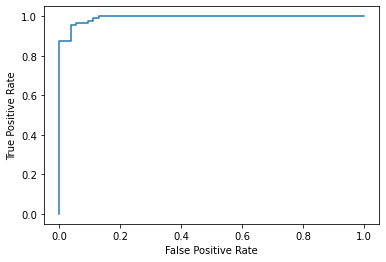

In [6]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

We can also get the area under the curve (AUC) as a metric:

In [7]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs[:,1])
print("AUC =",auc)

AUC = 0.9927174365376612


The precision-recall (PR) curve is also a useful evaluation for tasks where we are most interested in eliminating false positives, e.g. screening a population for a disease.

In [8]:
from sklearn.metrics import precision_recall_curve

pre,rec,thresholds = precision_recall_curve(y_test,probs[:,1])

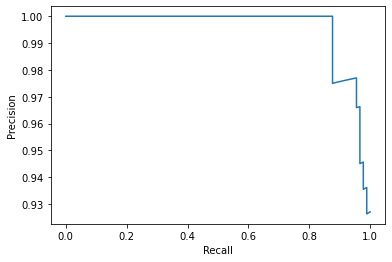

In [9]:
plt.plot(rec,pre)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

The [weighted average precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) over this curve is often quoted as a metric:

In [10]:
from sklearn.metrics import average_precision_score
avg_pre = average_precision_score(y_test, probs[:,1])
print("Average precision =",avg_pre)

Average precision = 0.9956004113719061


### [Evaluating Regressors](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Once again, there are several metrics for evaluation of regression - the user guide has full details for each one.

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

In [12]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100),max_iter=10000)
nn.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=10000)

In [13]:
y_pred = nn.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,max_error,explained_variance_score,r2_score

print("Mean Absolute Error, MAE = %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
print("Max Error = %.2f" % max_error(y_test, y_pred))
print("Explained Variance Score = %.2f" % explained_variance_score(y_test, y_pred))
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))


Mean Absolute Error, MAE = 45.33
Mean squared error, MSE = 3202.31
Max Error = 159.37
Explained Variance Score = 0.36
Coefficient of determination, r2 = 0.35


### [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

Cross-validation is essential in model development - it allows us to compare the performance of alternative algorithms and different settings for model hyperparameters, *without* making use of the test data. This is very important so that we can obtain an accurate assessment of the final model performance.

`KFold` is a simple way to get the data indices for cross-validation, which we can loop over:

In [15]:
# Using only the first 100 data points
X = diabetes.data[:100]
y = diabetes.target[:100]

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

for train, test in kf.split(X):
    print("training set indices:")
    print(train)
    print("test set indices:")
    print(test)
    lm.fit(X[train], y[train])
    y_pred = lm.predict(X[test])
    print("r2 = %.2f" % r2_score(y[test],y_pred))
    print()

training set indices:
[ 1  2  3  5  6  7  8  9 11 13 14 15 16 17 19 20 21 23 24 25 26 27 28 29
 32 34 35 36 37 38 40 41 42 43 46 47 48 49 50 51 52 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 71 72 74 75 78 79 81 82 84 85 86 87 88 89 91
 92 93 94 95 96 97 98 99]
test set indices:
[ 0  4 10 12 18 22 30 31 33 39 44 45 53 70 73 76 77 80 83 90]
r2 = 0.32

training set indices:
[ 0  1  2  3  4  6  7  8 10 12 13 14 17 18 19 20 21 22 23 24 25 27 29 30
 31 32 33 34 36 37 38 39 41 43 44 45 46 48 49 50 51 52 53 54 56 57 58 59
 60 61 62 63 64 67 68 70 71 73 74 75 76 77 78 79 80 81 82 83 84 86 87 89
 90 91 92 94 95 97 98 99]
test set indices:
[ 5  9 11 15 16 26 28 35 40 42 47 55 65 66 69 72 85 88 93 96]
r2 = 0.48

training set indices:
[ 0  1  2  4  5  9 10 11 12 14 15 16 18 20 21 22 23 26 28 29 30 31 32 33
 35 37 39 40 41 42 43 44 45 46 47 48 50 51 52 53 54 55 56 57 58 59 60 61
 63 65 66 67 68 69 70 71 72 73 74 75 76 77 79 80 82 83 84 85 86 87 88 90
 91 92 93 94 96 97 98 99]
test set indices:

If we just want to calculate a metric, there is another convenient function `cross_val_score`.

In [18]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
score = cross_val_score( lm,X,y,cv=5,scoring='r2' )
print("Cross-validated r2:")
print(score)

Cross-validated r2:
[ 0.38915383  0.33105085 -0.12256093  0.32232387  0.09693716]


We would usually quote the mean score under cross-validation:

In [19]:
print("mean r2 =", np.mean(score))

mean r2 = 0.20338095476907236


The standard deviation of the cross-validation scores is also useful as an estimate of the error compared to the true performance on unseen test data.

In [20]:
print("sd =", np.std(score))

sd = 0.1910638505798854


In addition to the basic *k*-fold cross-validation, there are many alternative procedures that may be suitable depending on the structure of your particular data set. 

For example, there may be definable subgroups within the data that we might want to leave out of training one at a time, to assess how good the predictor is at extrapolating beyond known groups.

### Exercise

Use ROC curves to compare the performance of a Decision Tree and Logistic Regressor on the `breast_cancer` dataset.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# TODO scale

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

logic = LogisticRegression(random_state=0)
logic.fit(X_train, y_train)
y_pred = logic.predict(X_test)


tree_probs = tree.predict_proba(X_test)
logic_probs = logic.predict_proba(X_test)


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'

Use 5-fold cross-validation to evaluate your regressor for the `wine_quality_white` dataset.